# Title of Project

#### Predicting Car Mileage (MPG) using Regression Analysis

# Objective

 #### The objective of this project is to build a regression model that predicts the fuel efficiency of cars (measured in miles per gallon, MPG) based on various features such as cylinders, displacement, horsepower, weight, acceleration, model year, origin, and possibly car name.

# Data Source

#### The dataset used for this project contains information about various cars, including their MPG and other relevant attributes. This  is dataset collected from kaggle

# Importing Libreries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Importing Data

In [2]:
df = pd.read_csv('carmpg.csv')


#### Exploring Data

In [4]:
df.head(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,8.0,8,307.0,130,3504,12.0,2015,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,2015,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,2015,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,2015,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,2015,1,ford torino


In [5]:
df.tail(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
393,27.0,4,140.0,86,2790,15.6,2003,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,2003,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,2003,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,2003,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,2003,1,chevy s-10


In [6]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model_year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car_Name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
df.describe()

,MPG,Cylinders,Displacement,Weight,Acceleration,Model_year,Origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.489447,5.454774,193.425879,2970.424623,15.568090,2008.989950,1.572864
std,7.849757,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,8.000000,3.000000,68.000000,1613.000000,8.000000,2003.000000,1.000000
25%,17.125000,4.000000,104.250000,2223.750000,13.825000,2006.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,2009.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,2012.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,2015.000000,3.000000


In [13]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model_year', 'Origin', 'Car_Name'],
      dtype='object')

In [11]:
df.isnull()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model_year,Origin,Car_Name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [12]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64

#### Data Visualization

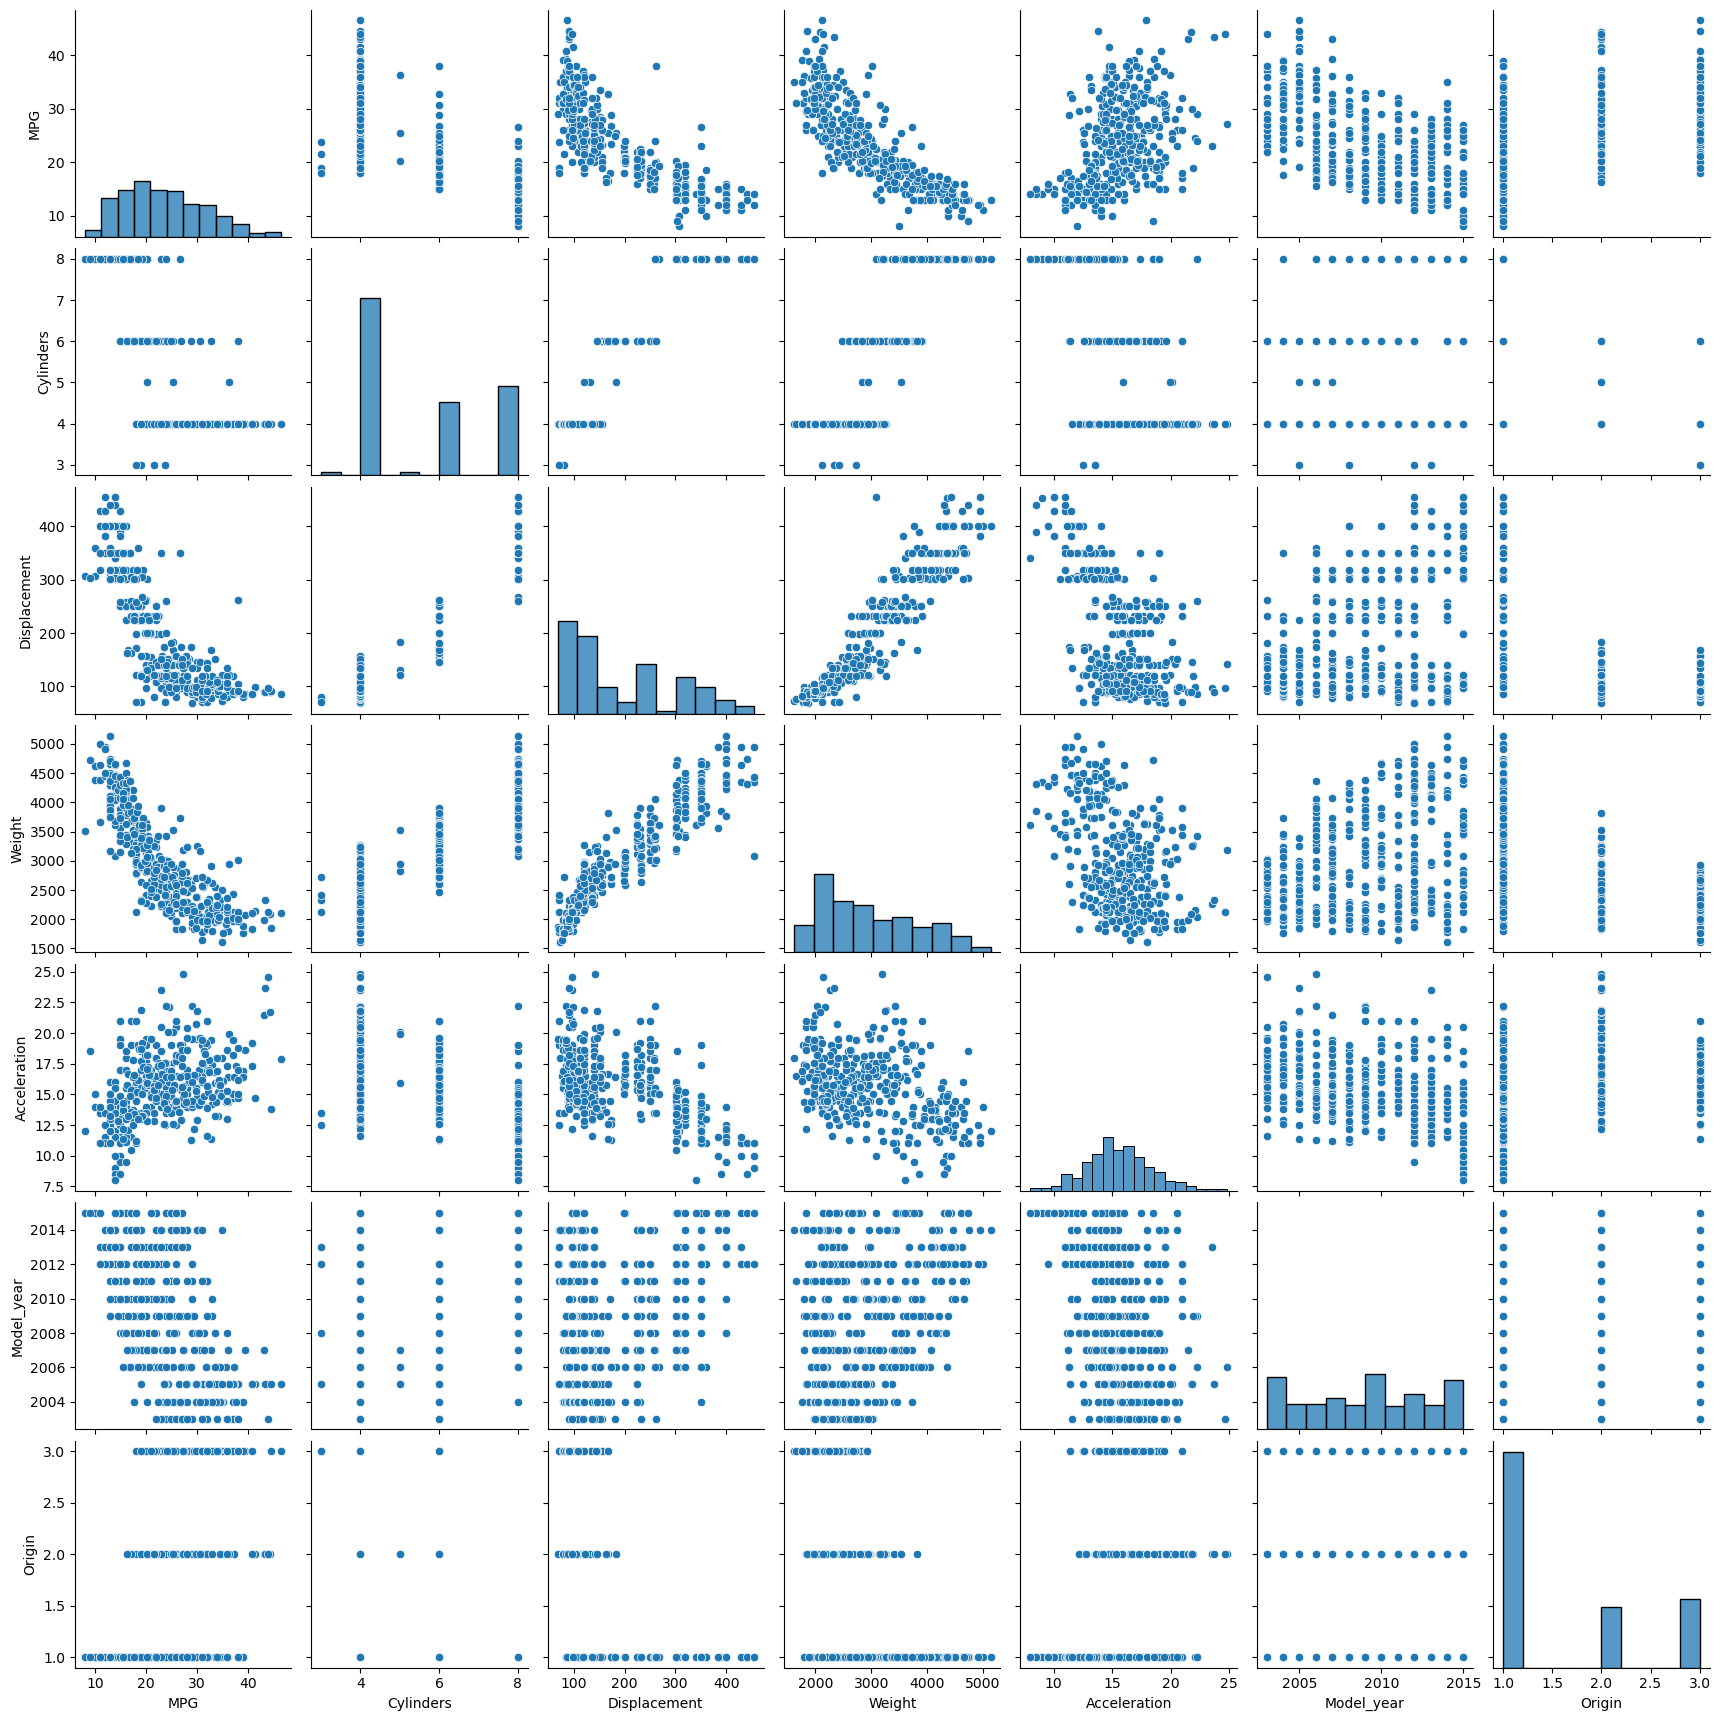

In [17]:
# Creating Pairplot for initial exploration

sns.pairplot(df)
plt.show()



##### Creating Correlation heatmap 

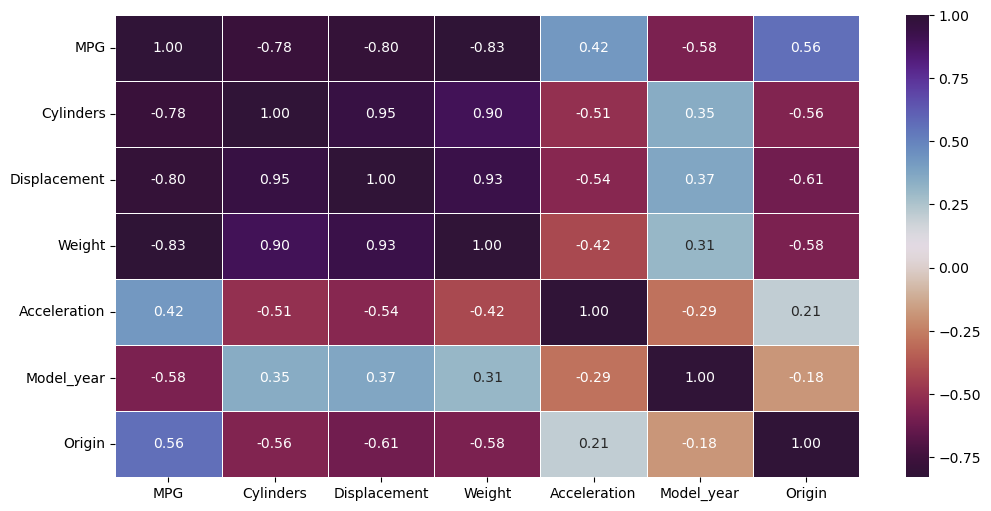

In [20]:
# Creating Correlation heatmap

plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='twilight_shifted_r', fmt='.2f', linewidths=0.5)
plt.show()


 #### Identifying and Handling Non-Numeric Values

In [28]:
# Checking unique values in each column to identify non-numeric values

for column in df.columns:
    unique_values = df[column].unique()
    print(f'Unique values in {column}: {unique_values}')


Unique values in MPG: [ 8.  15.  18.  16.  17.  14.  24.  22.  21.  27.  26.  25.  10.  11.
  9.  28.  19.  12.  13.  23.  30.  31.  35.  20.  29.  32.  33.  17.5
 15.5 14.5 22.5 24.5 18.5 29.5 26.5 16.5 31.5 36.  25.5 33.5 20.5 30.5
 21.5 43.1 36.1 32.8 39.4 19.9 19.4 20.2 19.2 25.1 20.6 20.8 18.6 18.1
 17.7 27.5 27.2 30.9 21.1 23.2 23.8 23.9 20.3 21.6 16.2 19.8 22.3 17.6
 18.2 16.9 31.9 34.1 35.7 27.4 25.4 34.2 34.5 31.8 37.3 28.4 28.8 26.8
 41.5 38.1 32.1 37.2 26.4 24.3 19.1 34.3 29.8 31.3 37.  32.2 46.6 27.9
 40.8 44.3 43.4 36.4 44.6 40.9 33.8 32.7 23.7 23.6 32.4 26.6 25.8 23.5
 39.1 39.  35.1 32.3 37.7 34.7 34.4 29.9 33.7 32.9 31.6 28.1 30.7 24.2
 22.4 34.  38.  44. ]
Unique values in Cylinders: [8 4 6 3 5]
Unique values in Displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  

In [29]:
# Replace '?' with NaN in 'Horsepower' column

df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# Check if there are NaN values introduced

print(df['Horsepower'].isnull().sum())  # Check how many NaN values are there

# Impute NaN values with the mean
df['Horsepower'].fillna(df['Horsepower'].mean(), inplace=True)


6


 #### Data Preprocessing

In [30]:
df.fillna(df.mean(), inplace=True)

C:\Users\ay304\AppData\Local\Temp\ipykernel_11248\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


#### Define Target Variable (y) and Feature Variables (X)

In [31]:
# Define target variable (y) and feature variables (X)

X = df.drop(['MPG', 'Car_Name'], axis=1)
y = df['MPG']


#### Spiliting data training and testing

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Modeling data

In [34]:
# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)


LinearRegression()

#### Model Evaluation

In [37]:
# Predicting results on the test set

y_pred = model.predict(X_test)

# Calculating metrics

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing Results

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 8.688687139440558
R-squared (R2): 0.8456344625709178


#### Prediction Results

In [41]:
features = X_test.iloc[0]  # Taking first row of test set
predicted_mpg = model.predict([features])
print(f'Predicted MPG: {predicted_mpg[0]}')


Predicted MPG: 32.86345735103964


C:\Users\ay304\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Explanation